# Bank customer churn prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df[df.duplicated() == True]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


The dataset does not have any duplicates or null values

In [7]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## Data Visualization and Analysis

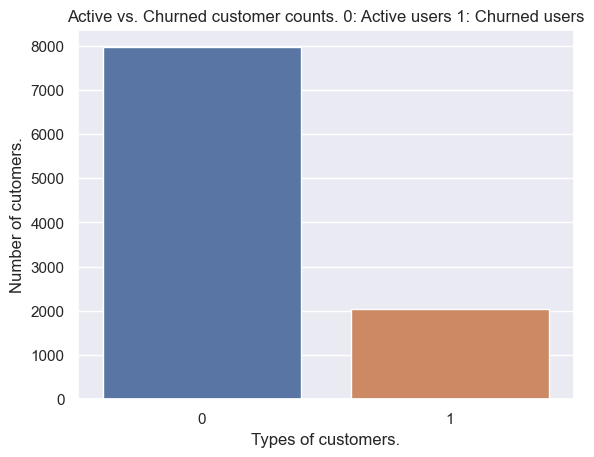

In [8]:
sns.set_theme()

sns.countplot(data=df, x=df["Exited"])
plt.title("Active vs. Churned customer counts. 0: Active users 1: Churned users")
plt.xlabel("Types of customers.")
plt.ylabel("Number of cutomers.", )
plt.show()

From the above bar chart we can say that the dataset is imbalanced

In [9]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

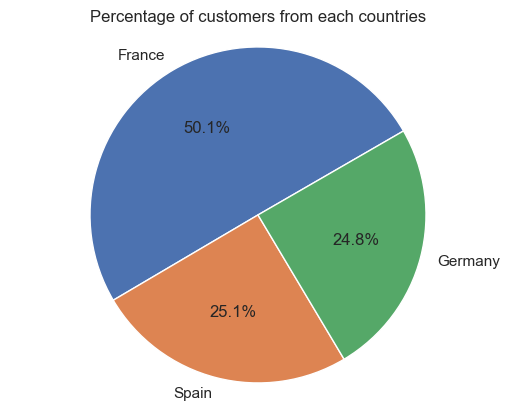

In [10]:
plt.pie(df["Geography"].value_counts().values, labels=df["Geography"].unique(), autopct='%1.1f%%', startangle=30)
plt.title('Percentage of customers from each countries')
plt.axis('equal')
plt.show()

From the above pie chart we can see that more than 50% of the customers are from France

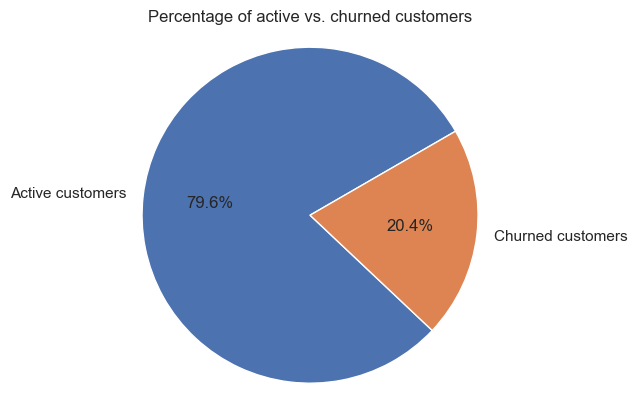

In [11]:
plt.pie(df["Exited"].value_counts().values, labels=["Active customers", "Churned customers"], autopct='%1.1f%%', startangle=30)
plt.title('Percentage of active vs. churned customers')
plt.axis('equal')
plt.show()

By looking at the pie chart we can clearly see that about 20% of the customers have stopped using the bank.

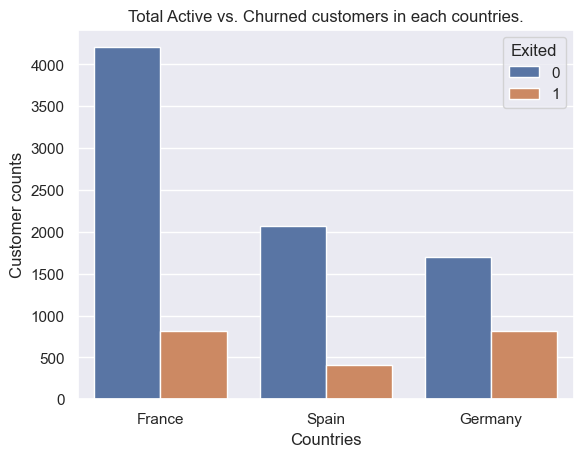

In [12]:
sns.countplot(data=df, x="Geography", hue="Exited")
plt.title("Total Active vs. Churned customers in each countries.")
plt.xlabel("Countries")
plt.ylabel("Customer counts")
plt.show()

From the above bar chart we can see that there are more Germans who churn. Perhaps they do not get proper services. 

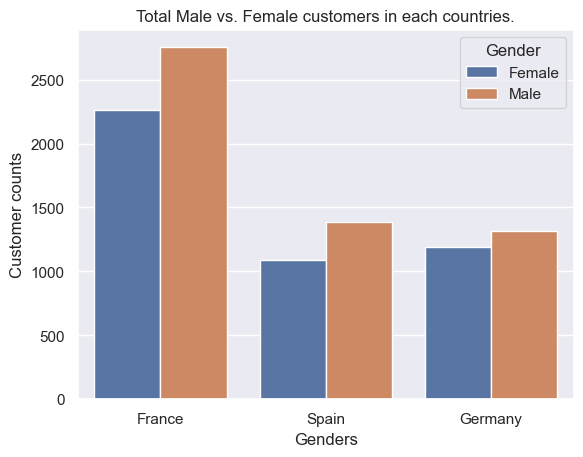

In [13]:
sns.countplot(data=df, x="Geography", hue="Gender")
plt.title("Total Male vs. Female customers in each countries.")
plt.xlabel("Genders")
plt.ylabel("Customer counts")
plt.show()

From the above bar chart we can see there are more Male account holders in every country

## Data Preprocessing

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Drop the unwanted columns

In [15]:
df.drop(columns = ["CustomerId", "RowNumber", "Surname"], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Convert all the categorical data into numerical data

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df["Geography"] = encoder.fit_transform(df["Geography"])
df["Gender"] = encoder.fit_transform(df["Gender"])

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## Model creation

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### Features selection

In [18]:
X = df.drop(columns="Exited", axis = 1)
y = df.Exited

### Split the dataset into training and testing set

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(8000, 10)
(8000,)
(2000, 10)
(2000,)


In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy_score(y_test, predictions)

0.7855

### Let's try features scaling and see if it increases the accuracy of the model

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [22]:
X_train_scaled

array([[-0.23082038,  0.30531046,  0.91509065, ..., -1.55337352,
         0.97725852,  0.42739449],
       [-0.25150912, -0.90503826, -1.09278791, ..., -1.55337352,
        -1.02327069, -1.02548708],
       [-0.3963303 ,  0.30531046, -1.09278791, ...,  0.64376017,
         0.97725852, -0.94479772],
       ...,
       [ 0.22433188, -0.90503826, -1.09278791, ...,  0.64376017,
         0.97725852, -0.14096853],
       [ 0.13123255, -0.90503826, -1.09278791, ...,  0.64376017,
         0.97725852,  0.01781218],
       [ 1.1656695 ,  0.30531046,  0.91509065, ...,  0.64376017,
        -1.02327069, -1.15822478]])

In [23]:
X_test_scaled

array([[-1.05008411, -0.88942308,  0.90179633, ...,  0.65543311,
         0.9426421 , -0.04925965],
       [ 0.29631699, -0.88942308,  0.90179633, ...,  0.65543311,
        -1.06084802, -0.58254072],
       [-1.24686581, -0.88942308, -1.10889783, ..., -1.52570869,
         0.9426421 , -0.16313933],
       ...,
       [-0.87401628,  1.51279996,  0.90179633, ..., -1.52570869,
         0.9426421 ,  1.07759708],
       [-0.31474197,  0.31168844, -1.10889783, ...,  0.65543311,
         0.9426421 ,  1.14197101],
       [ 0.0373937 ,  0.31168844,  0.90179633, ...,  0.65543311,
         0.9426421 , -0.88821212]])

In [24]:
X_train.shape

(8000, 10)

In [25]:
X_train_scaled.shape

(8000, 10)

In [26]:
X_test.shape

(2000, 10)

In [27]:
X_test_scaled.shape

(2000, 10)

In [28]:
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

accuracy_score(y_test, predictions)

0.8065

2% increment in accuracy

### let's try different algorithms

In [29]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

accuracy_score(y_test, predictions)

0.793

In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

accuracy_score(y_test, predictions)

0.8635